In [2]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

In [3]:
#loading dataset 

dataset = load_dataset("lukebarousse/data_jobs")

data_jobs = dataset['train'].to_pandas()

data_jobs ["job_posted_date"] = pd.to_datetime(data_jobs.job_posted_date)

In [4]:
datajobs_australia = data_jobs[data_jobs['job_country'] == "Australia"].copy()



In [5]:
datajobs_australia ["job_posted_month"] = datajobs_australia["job_posted_date"].dt.strftime("%B")

datajobs_australia

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,"['python', 'sql', 'r', 'java', 'bash', 'react'...","{'analyst_tools': ['tableau'], 'libraries': ['...",November
501,Software Engineer,Senior Engineer - Platform Engineering,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-04-01 13:10:30,False,False,Australia,None,NaN,NaN,Slalom Build,"['aws', 'chef', 'puppet', 'ansible', 'terraform']","{'cloud': ['aws'], 'other': ['chef', 'puppet',...",April
758,Senior Data Engineer,Senior Data Engineer,"Sydney NSW, Australia",via Trabajo.org,Full-time,False,Australia,2023-03-18 13:15:07,True,False,Australia,None,NaN,NaN,Mirvac,"['aws', 'snowflake', 'azure']","{'cloud': ['aws', 'snowflake', 'azure']}",March
1178,Data Engineer,Data Center Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-02-09 13:38:29,False,False,Australia,None,NaN,NaN,Technical Global Solutions,"['react', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['re...",February
1278,Cloud Engineer,Infrastructure Engineer,"Fortitude Valley QLD, Australia",via LinkedIn,Full-time,False,Australia,2023-03-01 13:25:38,False,False,Australia,None,NaN,NaN,Equinix Asia-Pacific,"['powershell', 'sql', 'sql server', 'azure', '...","{'cloud': ['azure', 'aws', 'vmware'], 'databas...",March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785322,Data Engineer,Data Engineer,"Brisbane QLD, Australia",via LinkedIn,Full-time,False,Australia,2023-01-17 07:05:54,False,False,Australia,None,NaN,NaN,Randstad Technologies Australia,"['sql', 'python', 'r', 'sql server', 'azure', ...","{'analyst_tools': ['ssis', 'ssrs', 'power bi']...",January
785333,Data Engineer,Data Engineer,"Melbourne VIC, Australia",via Trabajo.org,Full-time,False,Australia,2023-07-15 06:17:16,True,False,Australia,None,NaN,NaN,Tata Group,"['sql', 'python', 'aws', 'redshift']","{'cloud': ['aws', 'redshift'], 'programming': ...",July
785377,Data Engineer,Data Engineer,"Melbourne VIC, Australia",via LinkedIn,Full-time,False,Australia,2023-01-09 06:15:32,False,False,Australia,None,NaN,NaN,eliiza,"['python', 'scala', 'java', 'nosql', 'aws', 'g...","{'cloud': ['aws', 'gcp', 'bigquery', 'snowflak...",January
785430,Data Engineer,Azure Data Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-01-31 06:27:09,False,False,Australia,None,NaN,NaN,Tata Consultancy Services,"['azure', 'power bi']","{'analyst_tools': ['power bi'], 'cloud': ['azu...",January


In [6]:
datajobsaus= datajobs_australia.pivot_table(index = "job_posted_month", columns= "job_title_short", aggfunc= "size")

In [7]:
datajobsaus.reset_index(inplace= True)
datajobsaus["month_no"]= pd.to_datetime(datajobsaus['job_posted_month'], format = "%B").dt.month

In [8]:
datajobsaus

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,68,52,94,351,64,35,11,121,18,163,4
1,August,102,72,172,461,102,38,49,162,37,212,8
2,December,34,31,83,182,73,26,11,62,14,92,12
3,February,51,22,85,361,73,25,21,92,16,76,2
4,January,144,28,213,760,152,31,56,230,35,97,1
5,July,61,49,135,373,108,36,15,134,27,128,7
6,June,34,20,92,311,81,14,15,97,14,52,6
7,March,59,53,93,372,64,31,23,119,22,189,3
8,May,45,19,56,281,49,17,13,89,21,88,5
9,November,115,48,188,325,139,30,29,112,25,170,11


In [9]:
datajobsaus.sort_values('month_no', inplace= True)

In [10]:
datajobsaus.set_index('job_posted_month', inplace= True)

In [11]:
datajobsaus.drop(columns="month_no", inplace = True)

In [12]:
top_3 = datajobsaus.sum().sort_values(ascending=False).head(3)
top_3 = top_3.index.tolist()

In [13]:
fuckknows = pd.read_csv('https://lukeb.co/software_csv', index_col = "job_posted_month")
fuckknows

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [14]:
datajobsaus2 = datajobsaus.merge(fuckknows, on = "job_posted_month")

datajobsaus2



,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,144,28,213,760,152,31,56,230,35,97,13619,9827,5108,4348
February,51,22,85,361,73,25,21,92,16,76,11456,9116,7298,4284
March,59,53,93,372,64,31,23,119,22,189,11102,8178,5814,4159
April,68,52,94,351,64,35,11,121,18,163,14037,9209,7232,4220
May,45,19,56,281,49,17,13,89,21,88,12126,8864,6718,4980
June,34,20,92,311,81,14,15,97,14,52,12003,8065,5902,4781
July,61,49,135,373,108,36,15,134,27,128,11914,8061,6839,4344
August,102,72,172,461,102,38,49,162,37,212,11571,8191,7413,4104
September,100,33,186,412,123,44,30,123,31,134,14016,8447,6139,4094


In [15]:
top_5 = (datajobsaus2.sum().sort_values(ascending = False).head().index.to_list())

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

In [17]:
datajobsaus2

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,144,28,213,760,152,31,56,230,35,97,13619,9827,5108,4348
February,51,22,85,361,73,25,21,92,16,76,11456,9116,7298,4284
March,59,53,93,372,64,31,23,119,22,189,11102,8178,5814,4159
April,68,52,94,351,64,35,11,121,18,163,14037,9209,7232,4220
May,45,19,56,281,49,17,13,89,21,88,12126,8864,6718,4980
June,34,20,92,311,81,14,15,97,14,52,12003,8065,5902,4781
July,61,49,135,373,108,36,15,134,27,128,11914,8061,6839,4344
August,102,72,172,461,102,38,49,162,37,212,11571,8191,7413,4104
September,100,33,186,412,123,44,30,123,31,134,14016,8447,6139,4094


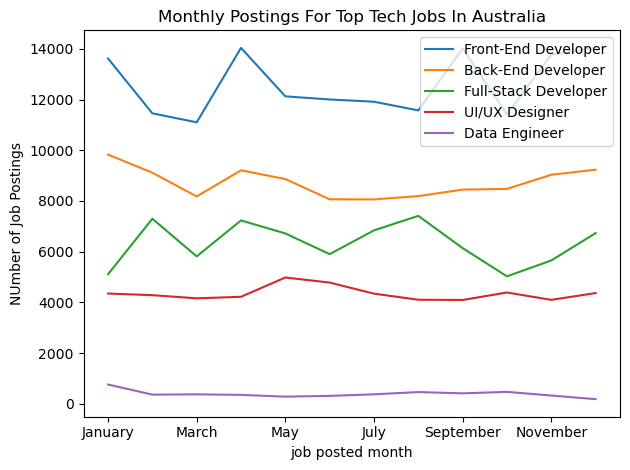

In [19]:
datajobsaus2 [top_5].plot(kind = "line")
plt.xlabel("job posted month")
plt.title("Monthly Postings For Top Tech Jobs In Australia")
plt.ylabel("NUmber of Job Postings")
plt.tight_layout()